# Polynomial Regression

Rafiq Islam  
2024-09-20

## Introduction

Polynomial regression is an extension of linear regression that captures
the relationship between the dependent and independent variables by
fitting a polynomial equation. Unlike linear regression, where the model
assumes a straight-line relationship, polynomial regression allows for
more complex relationships, enabling the model to fit non-linear data
more accurately.

### What is Polynomial Regression?

Polynomial regression is a type of regression where the relationship
between the independent variable $X$ and the dependent variable $y$ is
modeled as an $n$th degree polynomial. The general form of a polynomial
regression model is:

$$
y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_n X^n + \epsilon
$$

Where:

-   $y$ is the predicted output (dependent variable),
-   $X$ is the input feature (independent variable),
-   $\beta_0, \beta_1, \dots, \beta_n$ are the coefficients to be
    learned,
-   $\epsilon$ is the error term (the difference between the actual and
    predicted values),
-   $n$ is the degree of the polynomial.

Polynomial regression can model non-linear data by introducing
polynomial terms (such as $X^2, X^3$, etc.), but the model is still
linear in terms of the coefficients, which is why it is often treated as
a type of linear regression.

### Mathematical Derivation of Polynomial Regression

The objective of polynomial regression, like linear regression, is to
minimize the **sum of squared errors (SSE)** between the observed values
$y_i$ and the predicted values $\hat{y}_i$. This can be done by applying
the **ordinary least squares (OLS)** method.

For simplicity, let’s assume a second-degree polynomial regression
model:

$$
\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2
$$

The error for each data point is the difference between the actual value
$y_i$ and the predicted value $\hat{y}_i$:

$$
e_i = y_i - \hat{y}_i = y_i - (\beta_0 + \beta_1 X_i + \beta_2 X_i^2)
$$

We aim to minimize the sum of squared errors (SSE):

$$
SSE = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{m} (y_i - (\beta_0 + \beta_1 X_i + \beta_2 X_i^2))^2
$$

Where $m$ is the number of data points.

We can represent this problem in matrix form to generalize for
higher-degree polynomials and simplify the calculation:

Let $X$ represent the **design matrix**, where each column corresponds
to a power of the independent variable $X$:

$$
X =
\begin{bmatrix}
1 & X_1 & X_1^2 \\
1 & X_2 & X_2^2 \\
\vdots & \vdots & \vdots \\
1 & X_m & X_m^2
\end{bmatrix}
$$

Let $\beta$ be the **coefficient vector**:

$$
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2
\end{bmatrix}
$$

And $y$ be the **output vector**:

$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

The predicted values can be written as:

$$
\hat{y} = X \beta
$$

To find the optimal coefficients $\beta$, we minimize the SSE, which can
be rewritten in matrix form as:

$$
SSE = (y - X\beta)^T(y - X\beta)
$$

To minimize this, we take the derivative of the SSE with respect to
$\beta$ and set it to zero:

$$
\frac{\partial}{\partial \beta} (y - X\beta)^T(y - X\beta) = -2X^T(y - X\beta) = 0
$$

Solving for $\beta$:

$$
\beta = (X^T X)^{-1} X^T y
$$

This gives the optimal solution for the coefficients $\beta$, which can
be used to predict the output $\hat{y}$. The detail proof of this
parameter $\hat{\beta}$ can be found in the
<a href="/dsandml/multiplelinreg/index.qmd" style="text-decoration:none" target="_blank">
multiple linear regression </a> page.

### Python Implementation of Polynomial Regression (One Variable)

We use `PolynomialFeatures` from `Scikit-learn` to transform our input
data $X$ to include polynomial terms (e.g., $X^2, X^3$, etc.).

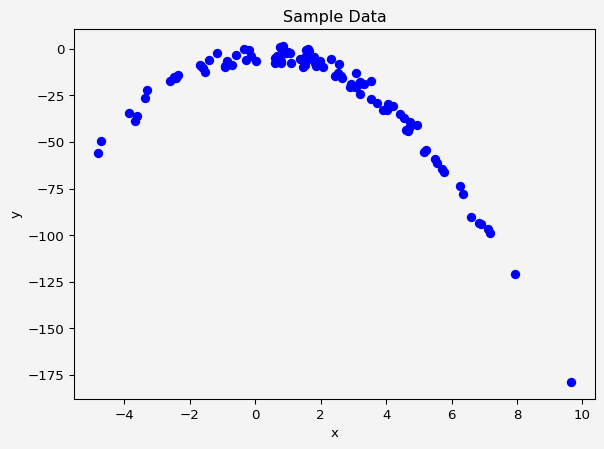

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)
X = X[:, np.newaxis]
plt.scatter(X, y, color='blue')
plt.title("Sample Data")
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

In [2]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X_poly = poly.fit_transform(X)

Now we fit a linear regression model on the transformed polynomial
features.

In [3]:
model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred)}")

Coefficients: [ 0.          0.96597113 -2.02225052]
Intercept: -2.4148356673536284
Mean Squared Error: 9.447441952450275

Finally, let’s plot the polynomial curve that fits the data.

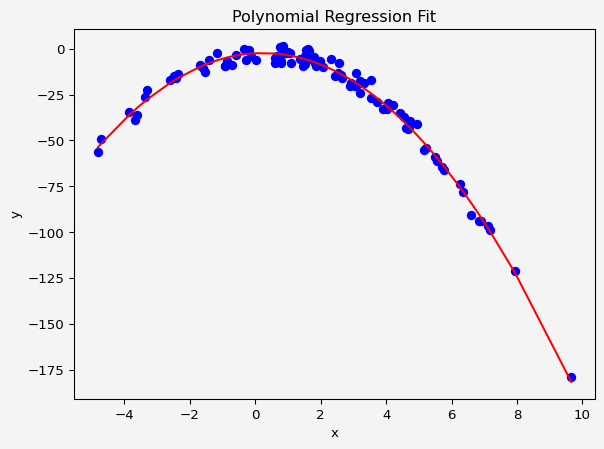

In [4]:
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_pred), key=sort_axis)
X_sorted, y_pred_sorted = zip(*sorted_zip)

# Plot the polynomial curve
plt.scatter(X, y, color='blue')
plt.plot(X_sorted, y_pred_sorted, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Polynomial Regression Fit")
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

We can evaluate the performance of the model by comparing the **mean
squared error (MSE)** between the actual and predicted values:

In [5]:
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.447441952450275

### Python Implementation of Polynomial Regression (Two Variables)

We’ll generate some non-linear data and try to fit a polynomial
regression model to it.

         x1         x2           y
0 -3.292157   7.065206  -41.206797
1  0.799528 -18.782072  -39.440680
2 -0.936214 -18.163880  -40.343409
3 -4.722680  -0.244826 -102.906711
4 -3.602674 -17.384987  -96.574641

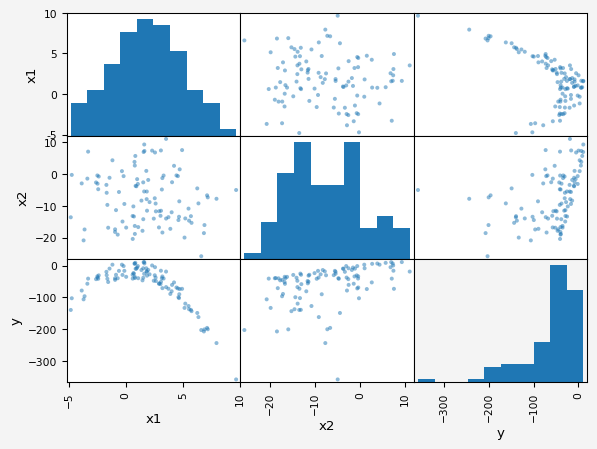

In [6]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
np.random.seed(0)
x1 = 2 - 3 * np.random.normal(0, 1, 100)
x2 = 4*np.random.normal(-2,2,100)
y = 2+3*x1 -4*x1**2 + 2 * x2 + np.random.normal(-3, 3, 100)
df={
    'x1':x1,
    'x2':x2,
    'y':y
}
df = pd.DataFrame(df)
print(df.head())
scatter_matrix(df)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Since it’s clear that the relationships are not linear. So if we fit a
linear regression model, it won’t be a good fit.

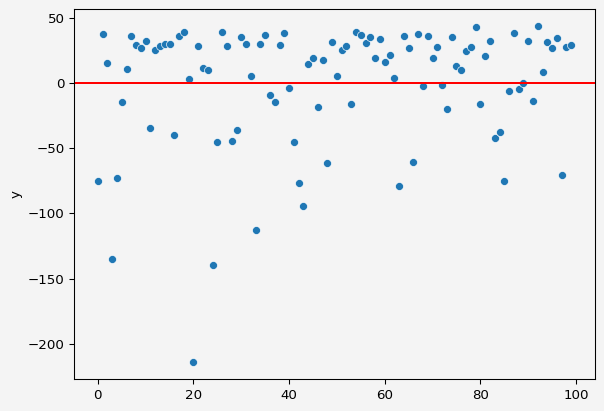

In [7]:
X = df.drop('y', axis=1)
y = df.y
model1 = LinearRegression()
model1.fit(X,y)
pred1 = model1.predict(X)
residual1 = y - pred1
sns.scatterplot(residual1)
plt.axhline(y=0, c='r')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

Therefore, we generate some non linear features from the given data.

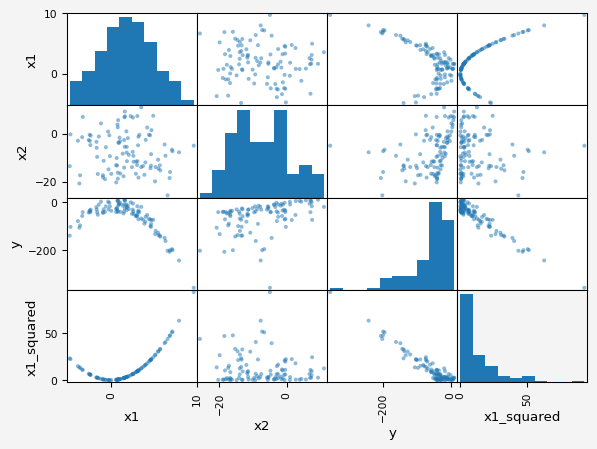

In [8]:
df['x1_squared']=df.x1**2
scatter_matrix(df)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

From this plot, we see that $x1$ is parabolic and $x2$ is linear in
relationship with $y$. So, how about a model that combines a linear and
quadratic model?

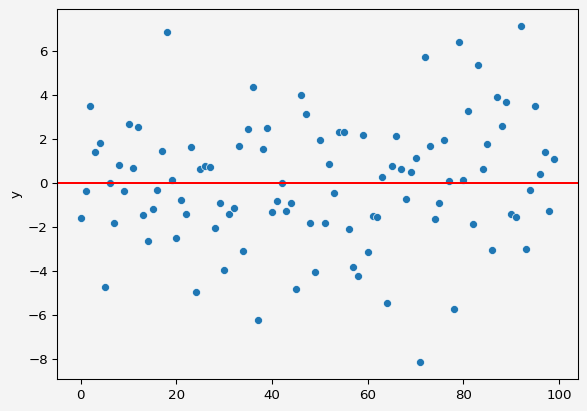

In [9]:
X = df.drop('y', axis=1)
y = df.y
model2 = LinearRegression()
model2.fit(X,y)
pred2 = model2.predict(X)
residual2 = y - pred2
sns.scatterplot(residual2)
plt.axhline(y=0, c='r')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.show()

This one is much better.

Polynomial regression is a powerful technique that extends the basic
linear regression model to capture non-linear relationships between
variables. By transforming the input data into polynomial terms, the
model becomes more flexible, allowing it to better fit data that doesn’t
follow a linear pattern.<br> <br> The mathematical derivation shows that
polynomial regression is still linear in terms of its parameters,
allowing us to use simple optimization techniques like ordinary least
squares (OLS) for parameter estimation.<br> <br> In Python, using
Scikit-learn makes it easy to implement polynomial regression. We can
increase the degree of the polynomial to improve model accuracy, but we
need to be careful of **overfitting**, where the model becomes too
complex and fits the noise in the data rather than the underlying
pattern.

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/polyreg/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/polyreg/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/polyreg/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**